# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

Assignment:

- Load the pretrainde Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

In [1]:
!git clone https://github.com/AshishJangra27/Gender-Style-Transfer.git

fatal: destination path 'Gender-Style-Transfer' already exists and is not an empty directory.


In [2]:
!git clone https://github.com/AshishJangra27/Face-Generator-with-GAN.git

fatal: destination path 'Face-Generator-with-GAN' already exists and is not an empty directory.


In [3]:
!ls Face-Generator-with-GAN/

Face_Generators.ipynb	       generator_200.h5  generator_500.h5  README.md
face-generator-with-gan.ipynb  generator_300.h5  generator_600.h5
generator_100.h5	       generator_400.h5  generator_700.h5


In [4]:
!ls Gender-Style-Transfer/

female_images_data.csv	grid_face_transformation.gif  README.md
gender_vec.npy		male_images_data.csv


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

generator_weights = './Face-Generator-with-GAN/generator_700.h5'
gender_vector = './Gender-Style-Transfer/gender_vec.npy'

generator = tf.keras.models.load_model(generator_weights)
gender_vector = np.load(gender_vector)

generator.summary()
gender_vector.shape

Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32768)          │     3,276,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 16, 16, 256)    │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 64, 64, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 128, 128, 32)   │        32,768 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 128, 128, 3)    │         1,536 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,067,584 (23.15 MB)

 Trainable params: 6,065,600 (23.14 MB)

 Non-trainable params: 1,984 (7.75 KB)

(1, 100)

In [6]:
from tqdm import tqdm

# z is a random latent vector (shape (1, 100))
# gender_vector is also shape (1, 100)
z = np.random.randn(1, 100)
alphas = np.linspace(-5, 5, 10)   # 10 steps female <-> male

images = []
for a in tqdm(alphas, desc='Generating Images', unit='a'):
    z_new = z + a * gender_vector
    img = generator(z_new)
    images.append(img)

Generating Images: 100%|██████████| 10/10 [00:00<00:00, 13.22a/s]


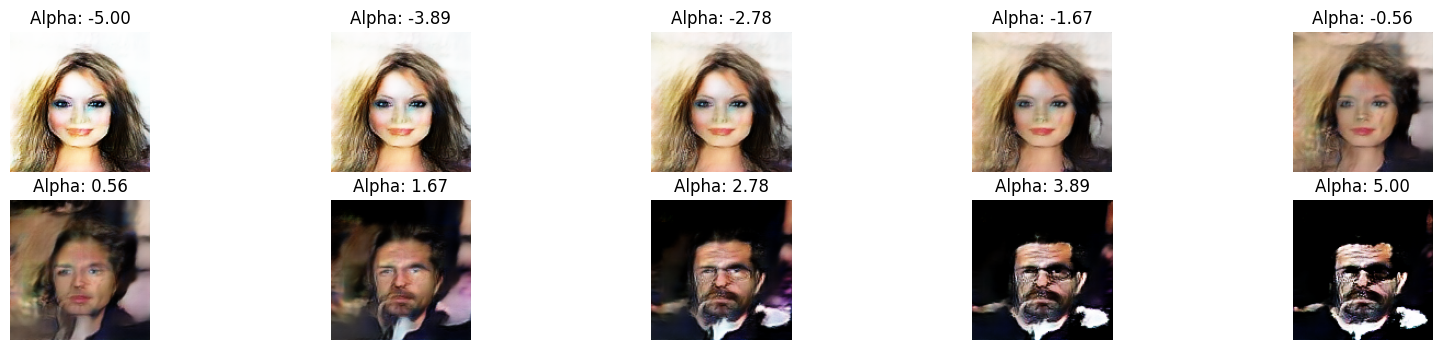

In [7]:
plt.figure(figsize=(20, 4))
for i, img in enumerate(images):
    plt.subplot(2, 5, i+1)
    plt.imshow((img[0] + 1) / 2)
    plt.axis("off")
    plt.title(f"Alpha: {alphas[i]:.2f}")
plt.show()

In [8]:
z = np.random.randn(1, 100)
alphas = np.linspace(-10, 10, 20)   # 20 steps male <-> female

images = []
for a in tqdm(alphas, desc='Generating Images', unit='a'):
    z_new = z + a * gender_vector
    img = generator(z_new)
    images.append(img)

Generating Images: 100%|██████████| 20/20 [00:00<00:00, 64.71a/s]


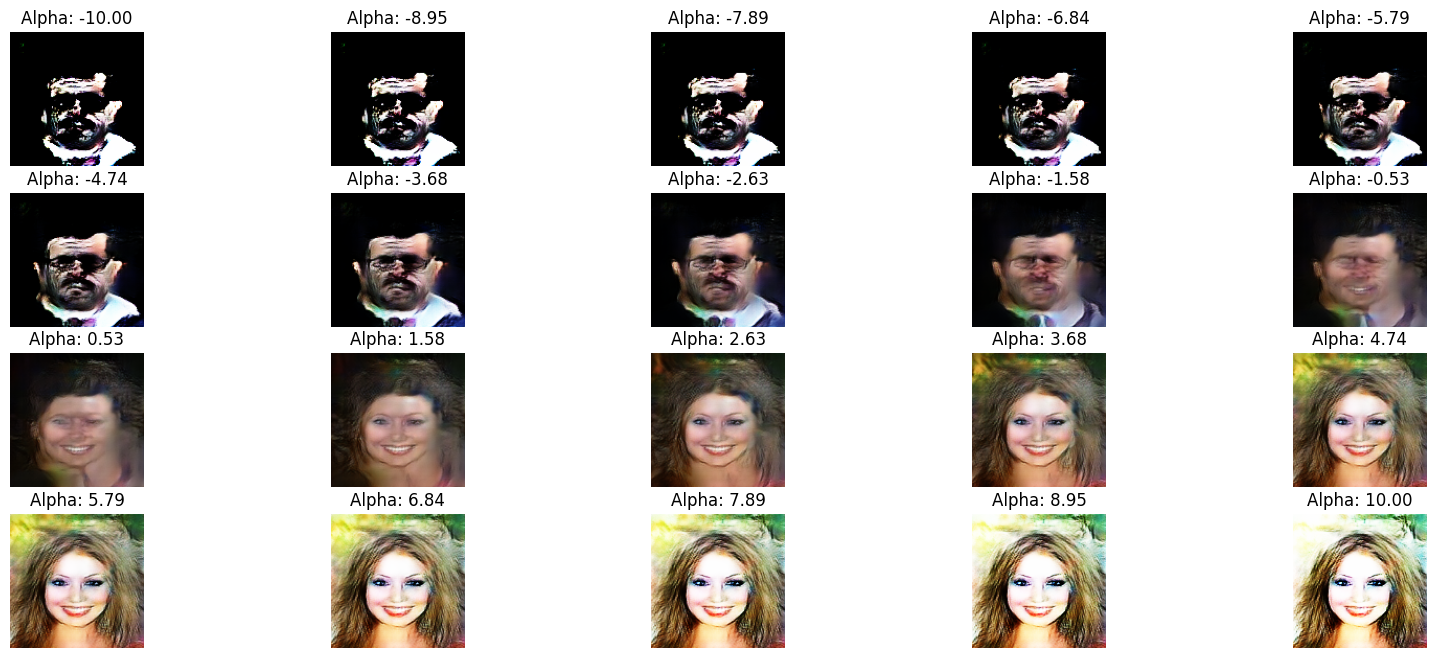

In [9]:
plt.figure(figsize=(20, 8))
for i, img in enumerate(images[::-1]):
    plt.subplot(4, 5, i+1)
    plt.imshow((img[0] + 1) / 2)
    plt.axis("off")
    plt.title(f"Alpha: {alphas[i]:.2f}")
plt.show()

## Conclusion

1. Loaded the 700th epoch GAN from <https://github.com/AshishJangra27/Face-Generator-with-GAN>
2. Loaded the gender vector from <https://github.com/AshishJangra27/Gender-Style-Transfer>
3. Created a random vector of (1, 100) same shape as gender vector
4. Generated 30 Variations of images (male <--> female)